In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [96]:
data = pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

In [97]:
def ols_cost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [98]:
def gradientDescent(X, y, theta, alpha, iters):
    
    # Define the temp matrix for theta
    temp = np.matrix(np.zeros(theta.shape))
    
    # Number of parameters to iterate through
    parameters = int(theta.ravel().shape[1])
    
    # cost vector to see how it progresses through each step
    cost = np.zeros(iters + 1)
    cost[0] = ols_cost(X, y, theta)
    
    # Calculate the error at each step
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
            
        theta = temp
        cost[i + 1] = ols_cost(X, y, theta)
        
    return theta, cost

In [99]:
alpha = 0.01
iters = 1000
sigma = data.std()
mu = data.mean()

X = pd.DataFrame(data['alcohol'])
X['x_0'] = 1
y = data['quality']
X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))


In [100]:
ols_cost(X, y, theta)

16.208255159474671

In [101]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)
ols_cost(X, y, theta_final)


0.26600767197905389

In [102]:
x = np.linspace(data.alcohol.min(), data.alcohol.max(), 100)
y_hat = theta_final[0,1] + theta_final[0,0] * x 

In [103]:
data_z = (data - data.mean()) / data.std()
sigma = data.std()
mu = data.mean()
print("Standard Deviations\n", sigma)
print("\nAverages\n", mu)

Standard Deviations
 fixed acidity            1.741096
volatile acidity         0.179060
citric acid              0.194801
residual sugar           1.409928
chlorides                0.047065
free sulfur dioxide     10.460157
total sulfur dioxide    32.895324
density                  0.001887
pH                       0.154386
sulphates                0.169507
alcohol                  1.065668
quality                  0.807569
dtype: float64

Averages
 fixed acidity            8.319637
volatile acidity         0.527821
citric acid              0.270976
residual sugar           2.538806
chlorides                0.087467
free sulfur dioxide     15.874922
total sulfur dioxide    46.467792
density                  0.996747
pH                       3.311113
sulphates                0.658149
alcohol                 10.422983
quality                  5.636023
dtype: float64


In [104]:
# Add the x_0 value
data_z['x_0'] = 1

X = data_z.drop(['quality'], axis=1)
y = data_z['quality']

X = np.matrix(X.values)
y = np.matrix(y.values).T
theta = np.matrix(np.zeros(shape=[1,X.shape[1]]))

In [105]:
theta_final, cost = gradientDescent(X, y, theta, alpha, iters)
ols_cost(X, y, theta_final)
x_hat_z = np.ones((100, X.shape[1]))
for i in range(1, x_hat_z.shape[1]):
    x_hat_z[:,i] = np.linspace(X[:,i].min(), X[:,i].max(), 100)

# y_hat_z is the normalized, predicted values.
y_hat_z = x_hat_z * theta_final.T

In [106]:
y_hat = y_hat_z * sigma[len(sigma) - 1] + mu[len(mu) - 1]
x_hat = x_hat_z
# First column is intercepts
x_hat[:,0:(len(sigma) - 1)] = x_hat_z[:,0:(len(
            sigma) - 1)] * np.atleast_2d(sigma[0:(
            len(sigma) - 1)]) + np.atleast_2d(mu[0:(
            len(sigma) - 1)])

In [107]:
# Use training data to calculate R-squared
y_hat_2 = np.ravel(X * theta_final.T * sigma[len(sigma) - 1] + mu[len(mu) - 1])
num = np.sum((data.quality - y_hat_2) ** 2)
den = np.sum((data.quality - data.quality.mean()) ** 2)
r_squared = 1 - num / den
r_squared

0.36035795138073523

In [108]:
from sklearn.linear_model import LinearRegression


In [109]:
X = data.drop(['quality'], axis=1)
y = data['quality']
lm = LinearRegression(fit_intercept=True, normalize=True)
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [110]:
X_ = np.matrix(X.values)
x_hat_sk = np.zeros((100, X.shape[1]))
for i in range(X.shape[1]):
    x_hat_sk[:,i] = np.linspace(X_[:,i].min(), X_[:,i].max(), 100)
y_hat_sk = lm.predict(x_hat_sk)

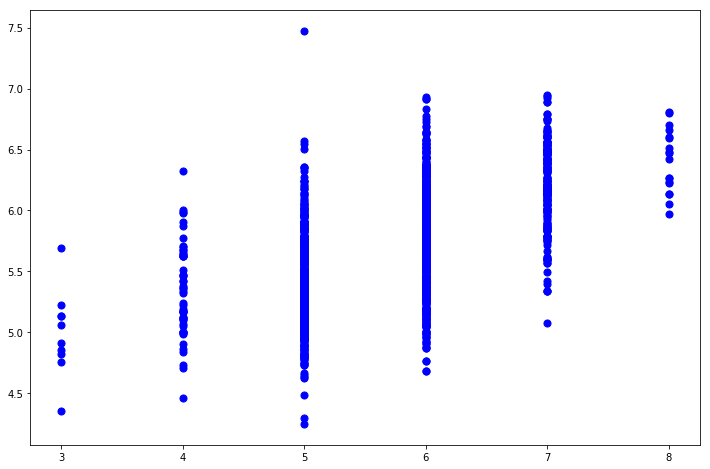

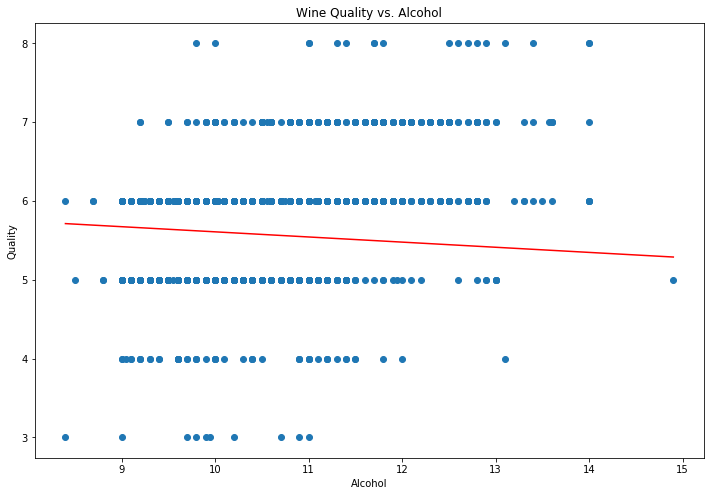

In [111]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data.alcohol, data.quality, label='Training Data')
plt.plot(x_hat_sk[:,10], y_hat_sk, 'r', label='Predicted Sklearn')
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Wine Quality vs. Alcohol")
plt.show()

In [112]:
lm.score(X, y)


0.36055170303868833

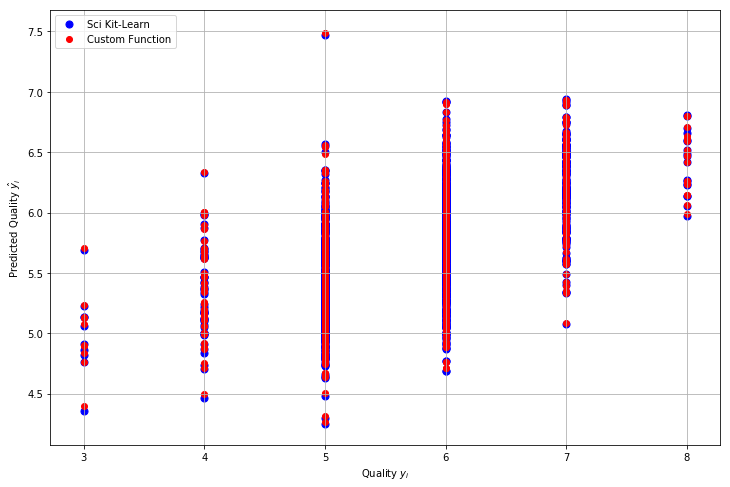

In [113]:
plt.figure(figsize=(12,8))
plt.scatter(y, y_hat_sk2, c='b', label='Sci Kit-Learn',
           s=50)
plt.scatter(y, y_hat_2, c='r', label='Custom Function')
plt.ylabel('Predicted Quality $\hat{y_i}$')
plt.xlabel('Quality $y_i$')
plt.legend(loc=2)
plt.grid()
plt.show()